In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
drinks = pd.read_csv("./data/drinks.csv")

In [72]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [73]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [74]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# 상관 분석

In [75]:
drinks[["beer_servings", "wine_servings"]]  # 2개의 피처 선택

,beer_servings,wine_servings
0,0,0
1,89,54
2,25,14
3,245,312
4,217,45
...,...,...
188,333,3
189,111,1
190,6,0
191,32,4


### 2개의 피처 간 상관 계수(Correlation Coefficient) 구하기 : corr()

In [76]:
corr = drinks[["beer_servings", "wine_servings"]].corr()  # 옵션 없이 실행해 봄
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [77]:
corr = drinks[["beer_servings", "wine_servings"]].corr(method="pearson")  # method 적용("pearson")
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


##### ※ pearson => 상관 계수를 구하는 계산 방법 중 하나로, 가장 널리 쓰이는 방법

### 여러개의 피처 간 상관 계수를 구해보자

In [78]:
arr = ["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]
corr = drinks[arr].corr(method="pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


# Seaborn을 활용해 시각화해보자

##### 참조 : https://seaborn.pydata.org/api.html

In [79]:
import seaborn as sns

In [80]:
corr.values  # (테스트)위에서 추출한 결과를 values로 출력했을 경우, 2차원 배열로 출력되는 것을 확인

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

In [81]:
labels = ["beer", "spirit", "wine", "alcohol"]  # 시각화 자료 label용 배열

### heatmap : 데이터프레임의 values를 파라미터로 넣어줌

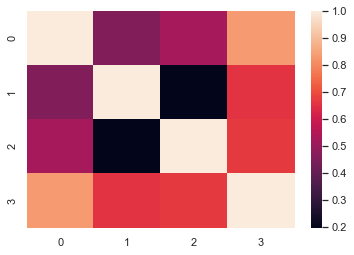

In [82]:
hm = sns.heatmap(corr.values)  # 이 상태로만 출력해보면 아래와 같음. 위 2차원 배열과 같음 형태인 것을 확인

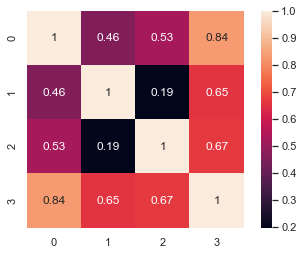

In [83]:
hm = sns.heatmap(corr.values, annot=True, square=True)  # annot: 해당 숫자 표기, square: 정사각형으로 출력

##### ※ annot => annotate(주석을 달다)

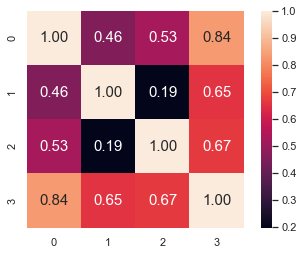

In [84]:
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15})  # fmt: 출력 포맷, annot_kws: 숫자 크기

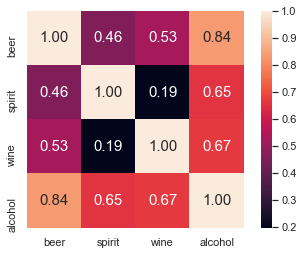

In [85]:
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15},
                xticklabels=labels, yticklabels=labels)  # xticklabels: x축 라벨, yticklabels: y축 라벨

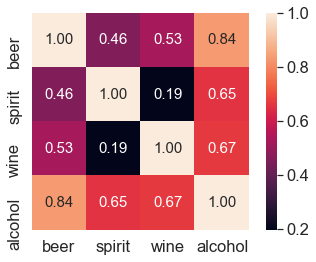

In [86]:
sns.set(font_scale=1.5)  # 폰트스케일 셋팅 가능
hm = sns.heatmap(corr.values, annot=True, square=True, fmt=".2f", annot_kws={"size":15},
                xticklabels=labels, yticklabels=labels)

### pairplot : 데이터프레임 자체를 파라미터로 넣어줌

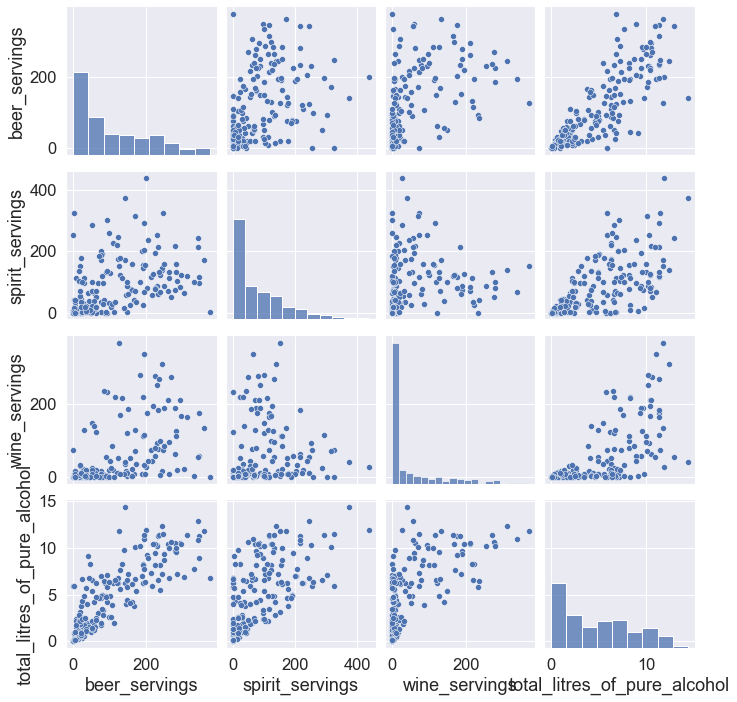

In [87]:
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

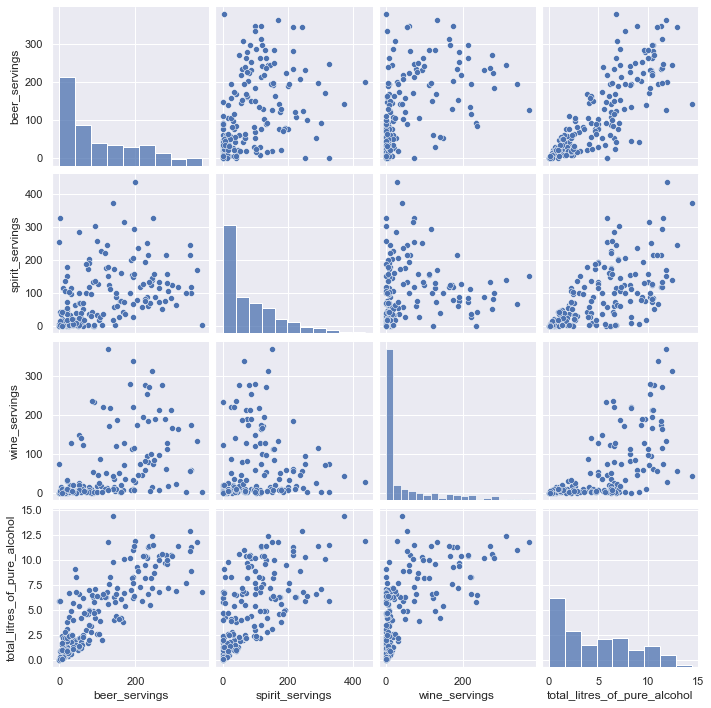

In [88]:
sns.set(context="notebook")  # 기본 셋팅 가능
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

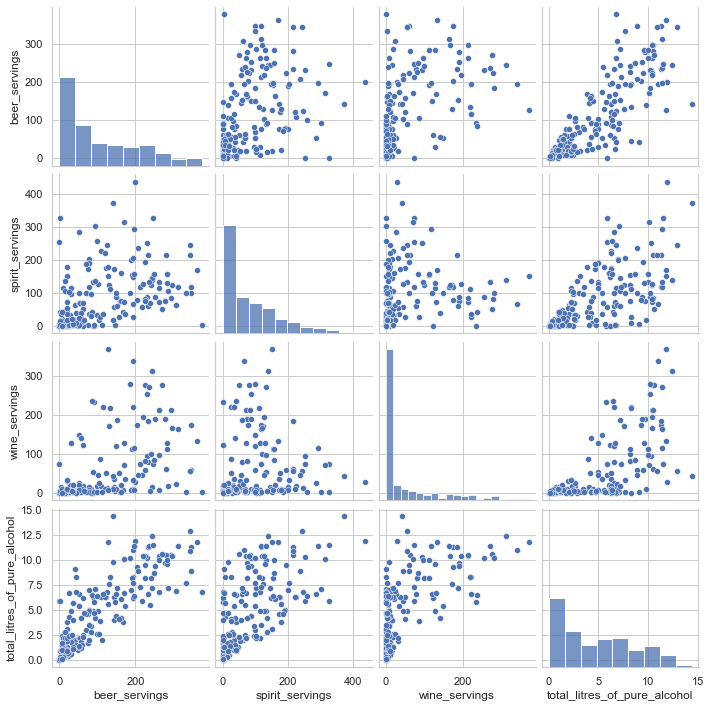

In [89]:
sns.set(style="whitegrid", context="notebook")  # 스타일 등 기본 셋팅 가능
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]])

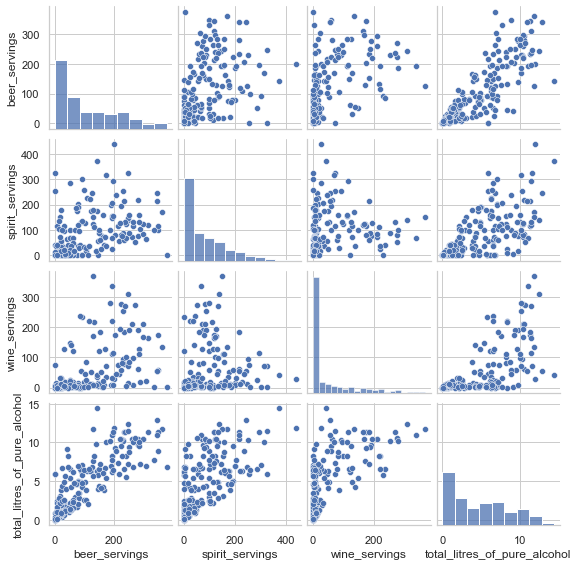

In [90]:
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]],
            height=2.0)  # 옵션을 통한 설정 가능